# Harassment Detection Model Project #

# 1. Preparing The Tools ##

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2
import random

seed_value = 42
tf.random.set_seed(seed_value)
np.random.seed(seed_value)
random.seed(seed_value)

## 2. Load the Dataset ##

In [2]:
data = pd.read_csv("youtoxic_english_1000.csv")
data.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


In [3]:
columns_to_keep = ['Text', 'IsToxic']

In [4]:
adjusted_data = data[columns_to_keep].copy()

In [5]:
adjusted_data['IsToxic'].value_counts()

IsToxic
False    538
True     462
Name: count, dtype: int64

In [6]:
adjusted_data['IsToxic']=adjusted_data['IsToxic'].astype(int)

In [7]:
adjusted_data.head()

,Text,IsToxic
0,If only people would just take a step back and...,0
1,Law enforcement is not trained to shoot to app...,1
2,\nDont you reckon them 'black lives matter' ba...,1
3,There are a very large number of people who do...,0
4,"The Arab dude is absolutely right, he should h...",0


In [8]:
value_counts = adjusted_data['IsToxic'].value_counts()

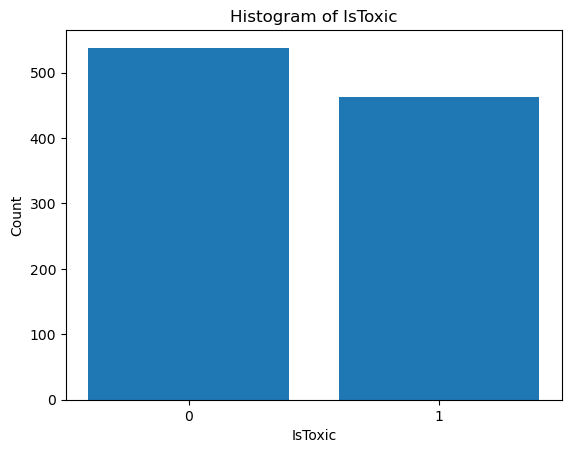

In [9]:
plt.bar(value_counts.index.astype(str), value_counts.values)
plt.xlabel('IsToxic')
plt.ylabel('Count')
plt.title('Histogram of IsToxic')
plt.show()

## 5. Modelling ##

In [10]:
# Split data into X and y
X = adjusted_data["Text"]

y = adjusted_data["IsToxic"]

In [11]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)   

In [12]:
# Define parameters
vocab_size = 10000
oov_tok = '<OOV>'
max_len = 50
padding_type = 'post'
truncate_type = 'post'

In [13]:
# Initialize Tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)


In [14]:
# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [15]:
# Pad sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding=padding_type, truncating=truncate_type)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding=padding_type, truncating=truncate_type)

In [16]:
np.random.seed(42)
tf.random.set_seed(42)


# Define model parameters
embedding_dim = 100
lstm_units = 64
dropout_rate = 0.7
num_classes = 1  # Assuming binary classification (toxic or non-toxic)


model = tf.keras.models.Sequential([
   Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    Bidirectional(LSTM(units=lstm_units, return_sequences=True)),
    BatchNormalization(),
    LSTM(units=lstm_units, kernel_regularizer=l2(0.01), dropout=dropout_rate),
    BatchNormalization(),
    Dense(units=num_classes, activation='sigmoid')
])

In [17]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
np.random.seed(42)
tf.random.set_seed(42)

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train_pad, y_train, epochs=20, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/20
23/23 [==============================] - 3s 53ms/step - loss: 2.3325 - accuracy: 0.5403 - val_loss: 2.0446 - val_accuracy: 0.5375
Epoch 2/20
23/23 [==============================] - 1s 38ms/step - loss: 1.9309 - accuracy: 0.5653 - val_loss: 1.7693 - val_accuracy: 0.5375
Epoch 3/20
23/23 [==============================] - 1s 40ms/step - loss: 1.6012 - accuracy: 0.6069 - val_loss: 1.5559 - val_accuracy: 0.5375
Epoch 4/20
23/23 [==============================] - 1s 40ms/step - loss: 1.3034 - accuracy: 0.6944 - val_loss: 1.3856 - val_accuracy: 0.5375
Epoch 5/20
23/23 [==============================] - 1s 41ms/step - loss: 1.0599 - accuracy: 0.7931 - val_loss: 1.2359 - val_accuracy: 0.6125
Epoch 6/20
23/23 [==============================] - 1s 42ms/step - loss: 0.8142 - accuracy: 0.8694 - val_loss: 1.1726 - val_accuracy: 0.5625
Epoch 7/20
23/23 [==============================] - 1s 40ms/step - loss: 0.6483 - accuracy: 0.9319 - val_loss: 1.0519 - val_accuracy: 0.6000
Epoch 8/20
23

In [19]:
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

7/7 [==============================] - 0s 11ms/step - loss: 0.9385 - accuracy: 0.7050
Test Loss: 0.9385, Test Accuracy: 0.7050


In [20]:
train_loss, train_accuracy = model.evaluate(X_train_pad, y_train)
print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")

25/25 [==============================] - 0s 11ms/step - loss: 0.5376 - accuracy: 0.9438
Train Loss: 0.5376, Train Accuracy: 0.9438
